# Tahu lah apa ini?

In [15]:
# Path to google drive folder
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002. Laporan-eksperimen
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024/

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [17]:

# Load the uploaded file
file_path = 'dataset/09_05_4_1_AgricultureOutliersVotingBasedResult_IDO_ONLY.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,Clay,Sand,SOM,if_outlier,dbscan_outlier,ocsvm_outlier,majority_voting,hard_voting,average_voting,weighted_voting
0,2/9/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,62.5,637.5,1.174072,1,1,1,1,1,1,1
1,2/10/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,62.5,637.5,1.174072,1,1,1,1,1,1,1
2,2/18/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,62.5,637.5,1.174072,1,1,1,1,1,1,1
3,2/19/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,...,62.5,637.5,1.174072,1,1,1,1,1,1,1
4,3/16/12,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,...,62.5,637.5,1.174072,1,1,1,1,1,1,1


## Outlier Comparison Graphics

In [18]:
# Reload the file to ensure we have the latest data
# data = pd.read_csv('dataset/09_05_4_1_AgricultureOutliersVotingBasedResult_IDO_ONLY.csv')

# Filter the data based on the majority_voting column
outliers = data[data['majority_voting'] == -1]
inliers = data[data['majority_voting'] == 1]


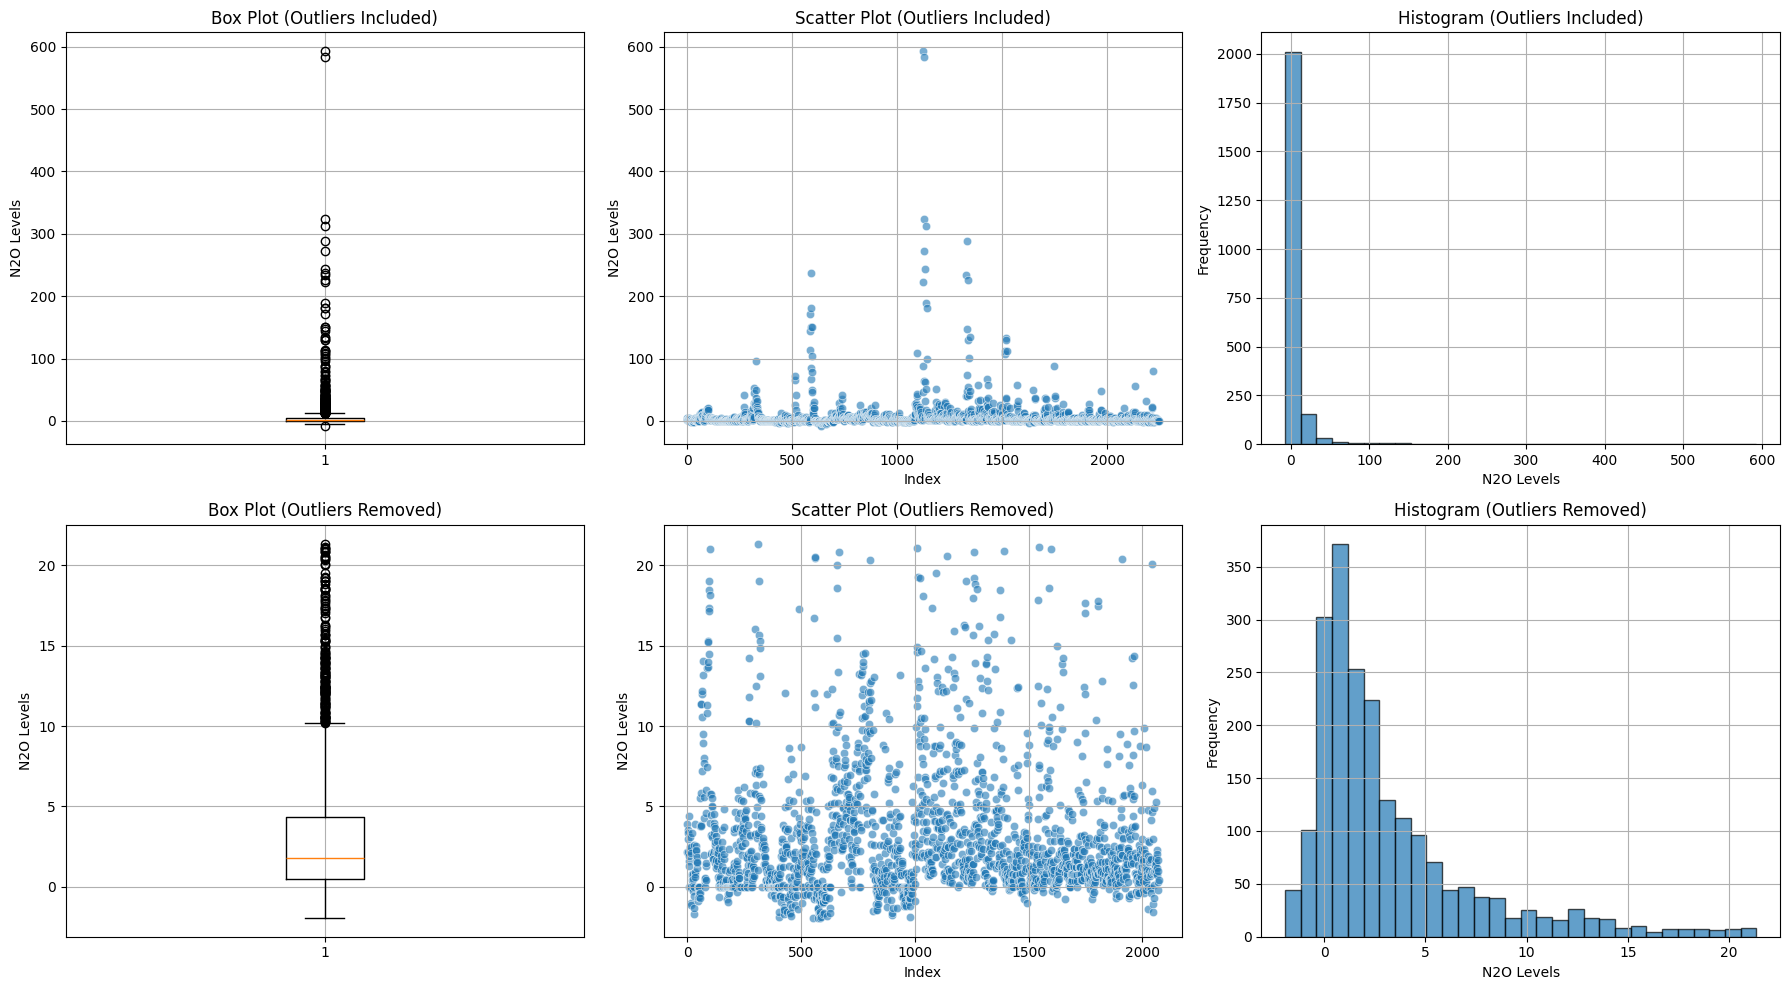

In [19]:

# Prepare the figure with 2x3 layout
plt.figure(figsize=(18, 10))

# First row: Data distribution with outliers included
# Box plot with outliers
plt.subplot(2, 3, 1)
plt.boxplot(data['N2O'])
plt.title('Box Plot (Outliers Included)')
plt.ylabel('N2O Levels')
plt.grid(True)

# Scatter plot with outliers
plt.subplot(2, 3, 2)
plt.scatter(range(len(data)), data['N2O'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot (Outliers Included)')
plt.xlabel('Index')
plt.ylabel('N2O Levels')
plt.grid(True)

# Histogram with outliers
plt.subplot(2, 3, 3)
plt.hist(data['N2O'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Histogram (Outliers Included)')
plt.xlabel('N2O Levels')
plt.ylabel('Frequency')
plt.grid(True)

# Second row: Data distribution with outliers removed based on majority_voting
# Box plot without outliers
plt.subplot(2, 3, 4)
plt.boxplot(inliers['N2O'])
plt.title('Box Plot (Outliers Removed)')
plt.ylabel('N2O Levels')
plt.grid(True)

# Scatter plot without outliers
plt.subplot(2, 3, 5)
plt.scatter(range(len(inliers)), inliers['N2O'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot (Outliers Removed)')
plt.xlabel('Index')
plt.ylabel('N2O Levels')
plt.grid(True)

# Histogram without outliers
plt.subplot(2, 3, 6)
plt.hist(inliers['N2O'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Histogram (Outliers Removed)')
plt.xlabel('N2O Levels')
plt.ylabel('Frequency')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a PNG file with 300 dpi
plt.savefig('visual/09_05_1_N2O_Data_Distribution_Comparison_BoxScatterHist.png', dpi=300)
plt.show()


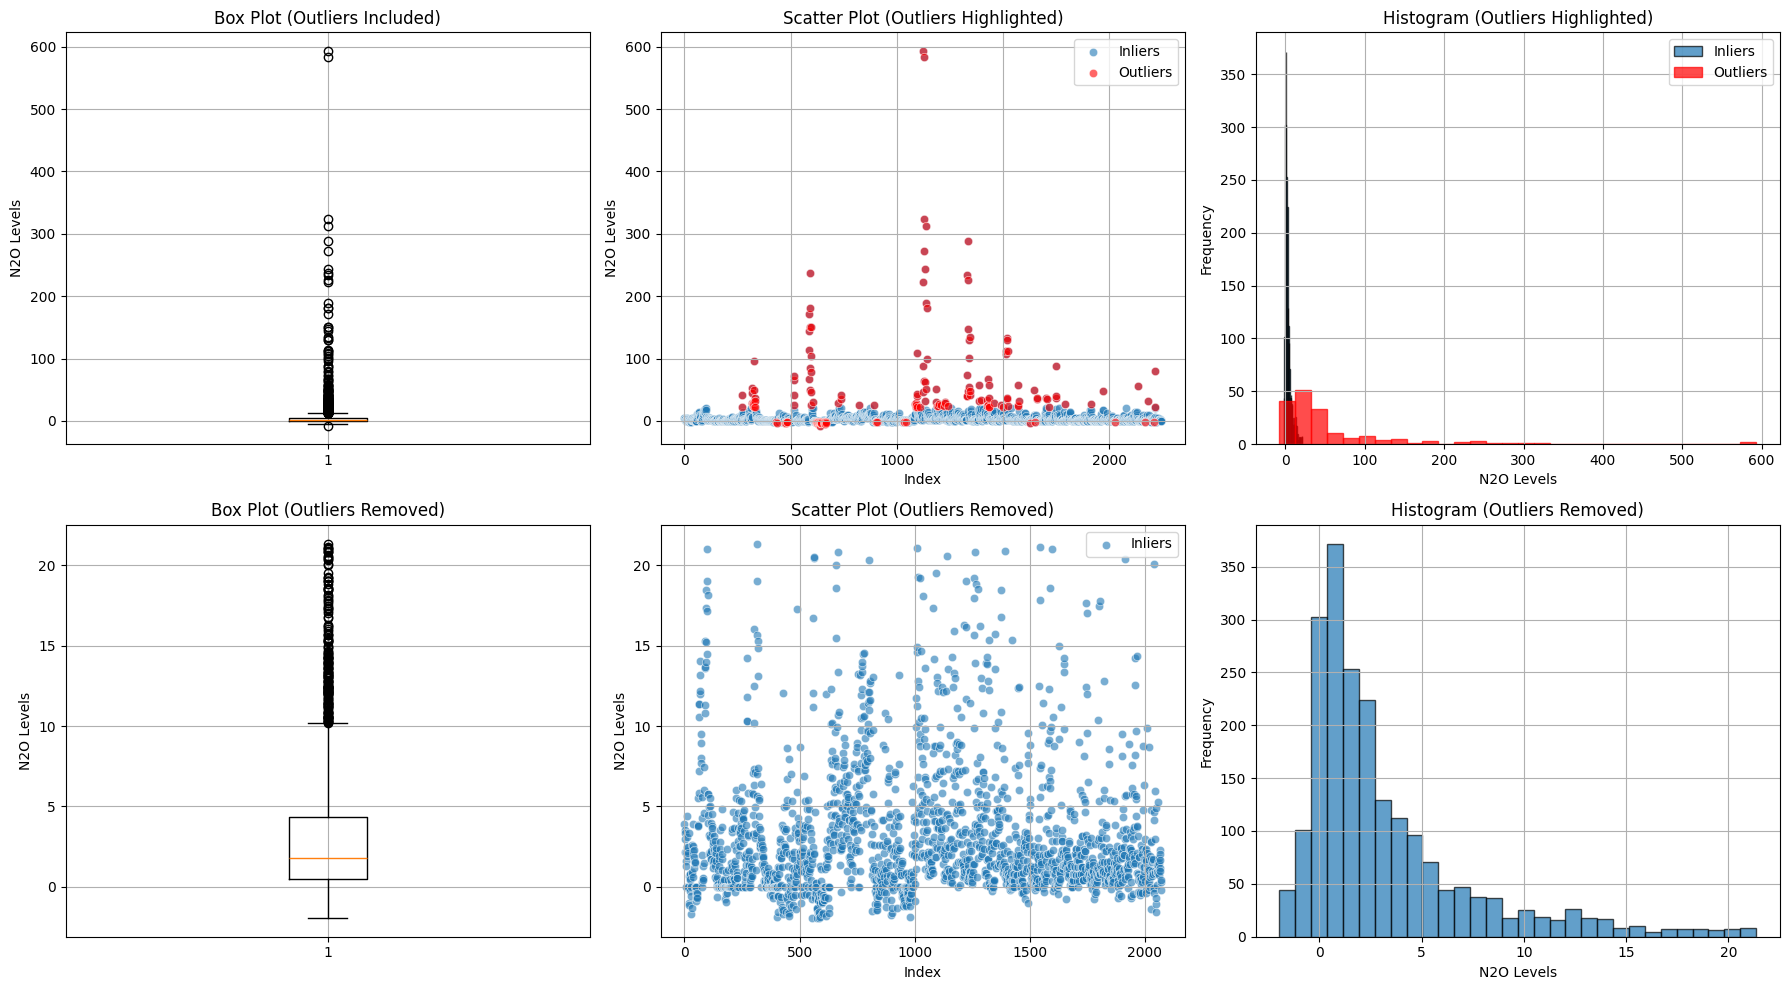

In [20]:
# Prepare the figure with 2x3 layout
plt.figure(figsize=(18, 10))

# Define a function to highlight outliers
def highlight_outliers(ax, data, outliers, feature):
    ax.scatter(outliers.index, outliers[feature], color='red', alpha=0.6, label='Outliers', edgecolors='w', linewidth=0.5)

# First row: Data distribution with outliers included
# Box plot with outliers
plt.subplot(2, 3, 1)
plt.boxplot(data['N2O'])
plt.title('Box Plot (Outliers Included)')
plt.ylabel('N2O Levels')
plt.grid(True)

# Scatter plot with outliers highlighted
plt.subplot(2, 3, 2)
plt.scatter(range(len(data)), data['N2O'], alpha=0.6, edgecolors='w', linewidth=0.5, label='Inliers')
highlight_outliers(plt.gca(), data, outliers, 'N2O')
plt.title('Scatter Plot (Outliers Highlighted)')
plt.xlabel('Index')
plt.ylabel('N2O Levels')
plt.legend()
plt.grid(True)

# Histogram with outliers highlighted
plt.subplot(2, 3, 3)
plt.hist(inliers['N2O'], bins=30, alpha=0.7, edgecolor='black', label='Inliers')
plt.hist(outliers['N2O'], bins=30, alpha=0.7, edgecolor='red', color='red', label='Outliers')
plt.title('Histogram (Outliers Highlighted)')
plt.xlabel('N2O Levels')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Second row: Data distribution with outliers removed based on majority_voting
# Box plot without outliers
plt.subplot(2, 3, 4)
plt.boxplot(inliers['N2O'])
plt.title('Box Plot (Outliers Removed)')
plt.ylabel('N2O Levels')
plt.grid(True)

# Scatter plot without outliers
plt.subplot(2, 3, 5)
plt.scatter(range(len(inliers)), inliers['N2O'], alpha=0.6, edgecolors='w', linewidth=0.5, label='Inliers')
plt.title('Scatter Plot (Outliers Removed)')
plt.xlabel('Index')
plt.ylabel('N2O Levels')
plt.legend()
plt.grid(True)

# Histogram without outliers
plt.subplot(2, 3, 6)
plt.hist(inliers['N2O'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Histogram (Outliers Removed)')
plt.xlabel('N2O Levels')
plt.ylabel('Frequency')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('visual/09_05_1_N2O_Data_Distribution_Comparison_BoxScatterHist_Color.png', dpi=300)

plt.show()


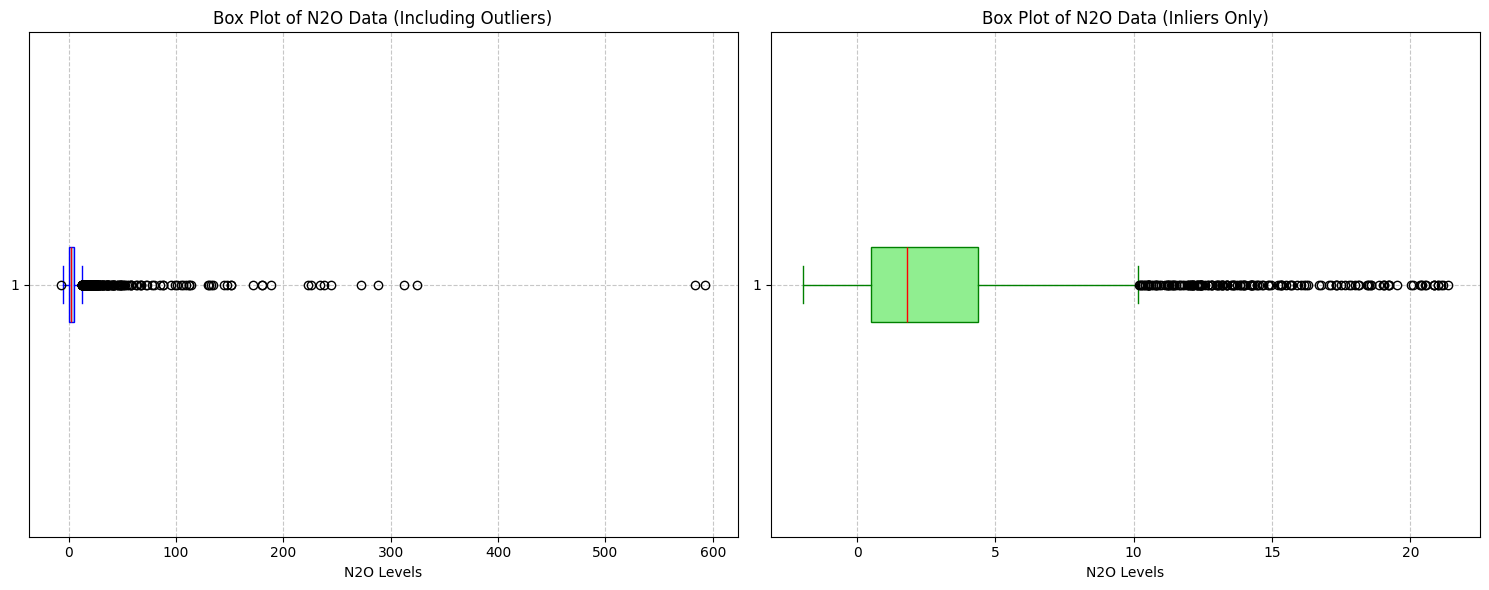

In [21]:
# Prepare the figure with 1x2 layout
plt.figure(figsize=(15, 6))

# First plot: Box plot for the entire N2O dataset (horizontal)
plt.subplot(1, 2, 1)
plt.boxplot(data['N2O'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'), capprops=dict(color='blue'), medianprops=dict(color='red'))
plt.title('Box Plot of N2O Data (Including Outliers)')
plt.xlabel('N2O Levels')
plt.grid(True, linestyle='--', alpha=0.7)

# Second plot: Box plot for inliers only
plt.subplot(1, 2, 2)
plt.boxplot(inliers['N2O'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'),
            whiskerprops=dict(color='green'), capprops=dict(color='green'), medianprops=dict(color='red'))
plt.title('Box Plot of N2O Data (Inliers Only)')
plt.xlabel('N2O Levels')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('visual/09_05_1_N2O_Data_Distribution_Comparison_HozBoxplot_Color.png', dpi=300)

plt.show()


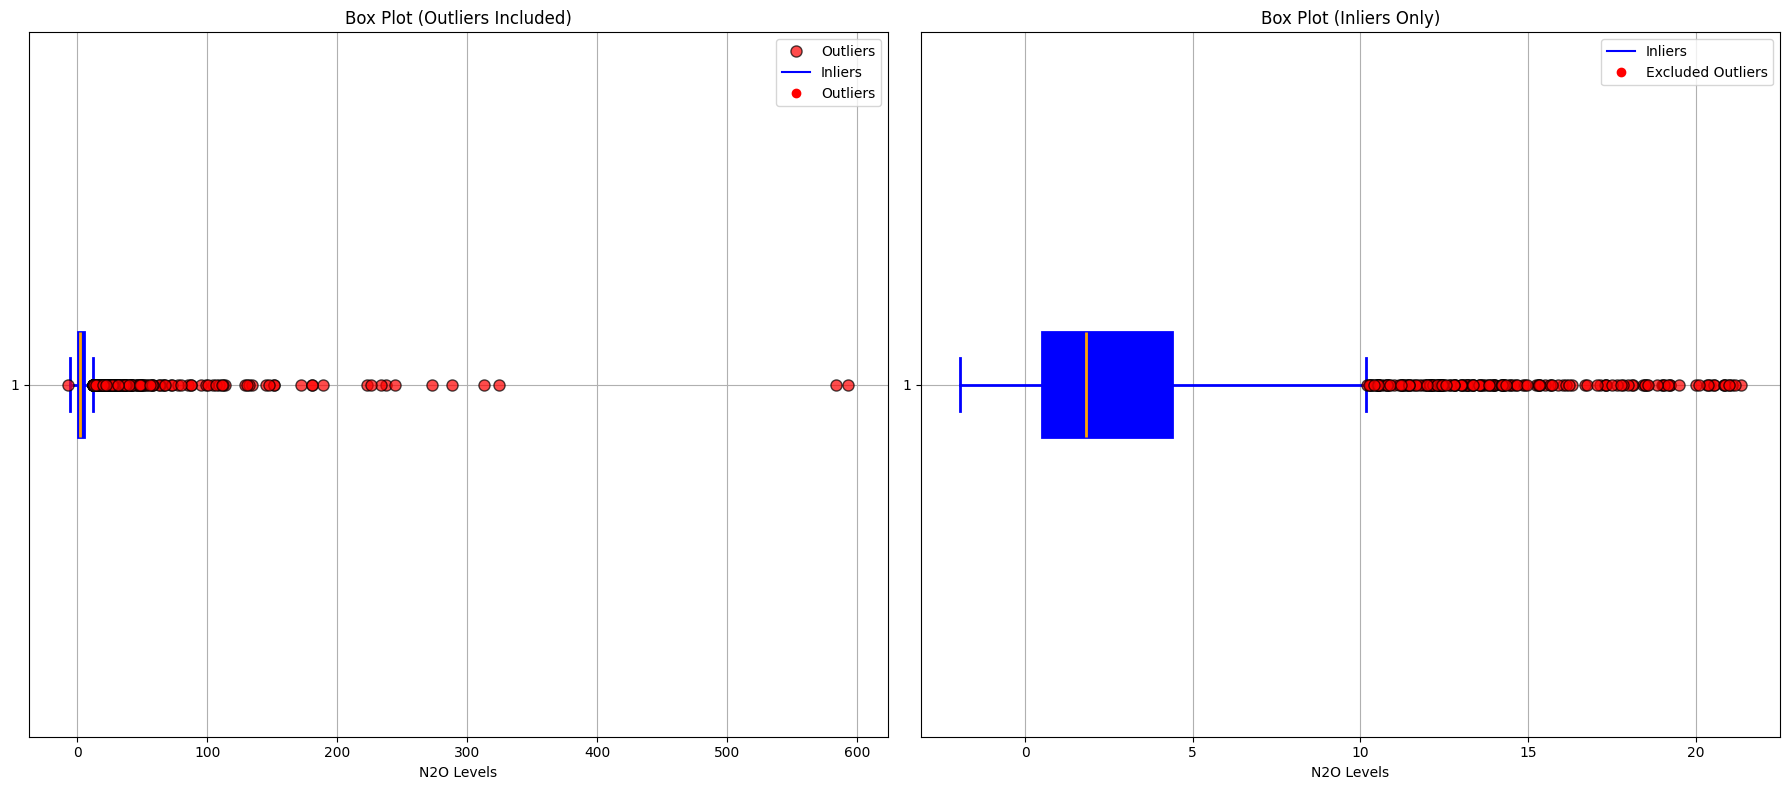

In [22]:
# Prepare the figure with 1x2 layout in horizontal style
plt.figure(figsize=(18, 8))

# Horizontal Box plot with outliers included
plt.subplot(1, 2, 1)
boxplot_elements = plt.boxplot(data['N2O'], vert=False, patch_artist=True)
# Customize box plot with vibrant colors
colors = ['blue', 'red']
for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    for i, item in enumerate(boxplot_elements[element]):
        if element == 'fliers':
            item.set(markerfacecolor=colors[1], marker='o', markersize=8, alpha=0.7, label='Outliers' if i == 0 else "")
        else:
            item.set(color=colors[0] if element != 'medians' else 'orange', linewidth=2)

plt.title('Box Plot (Outliers Included)')
plt.xlabel('N2O Levels')
plt.grid(True)

# Add legend manually for the box plot with outliers
plt.plot([], c='blue', label='Inliers')
plt.plot([], c='red', label='Outliers', marker='o', linestyle='None')
plt.legend()

# Horizontal Box plot for inliers only
plt.subplot(1, 2, 2)
boxplot_elements_no_outliers = plt.boxplot(inliers['N2O'], vert=False, patch_artist=True)
# Customize box plot with vibrant colors
for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    for i, item in enumerate(boxplot_elements_no_outliers[element]):
        if element == 'fliers':
            item.set(markerfacecolor=colors[1], marker='o', markersize=8, alpha=0.7)
        else:
            item.set(color=colors[0] if element != 'medians' else 'orange', linewidth=2)

plt.title('Box Plot (Inliers Only)')
plt.xlabel('N2O Levels')
plt.grid(True)

# Add legend manually for the box plot without outliers
plt.plot([], c='blue', label='Inliers')
plt.plot([], c='red', label='Excluded Outliers', marker='o', linestyle='None')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('visual/09_05_1_N2O_Data_Distribution_Comparison_BoxHorizontal.png', dpi=300)

plt.show()


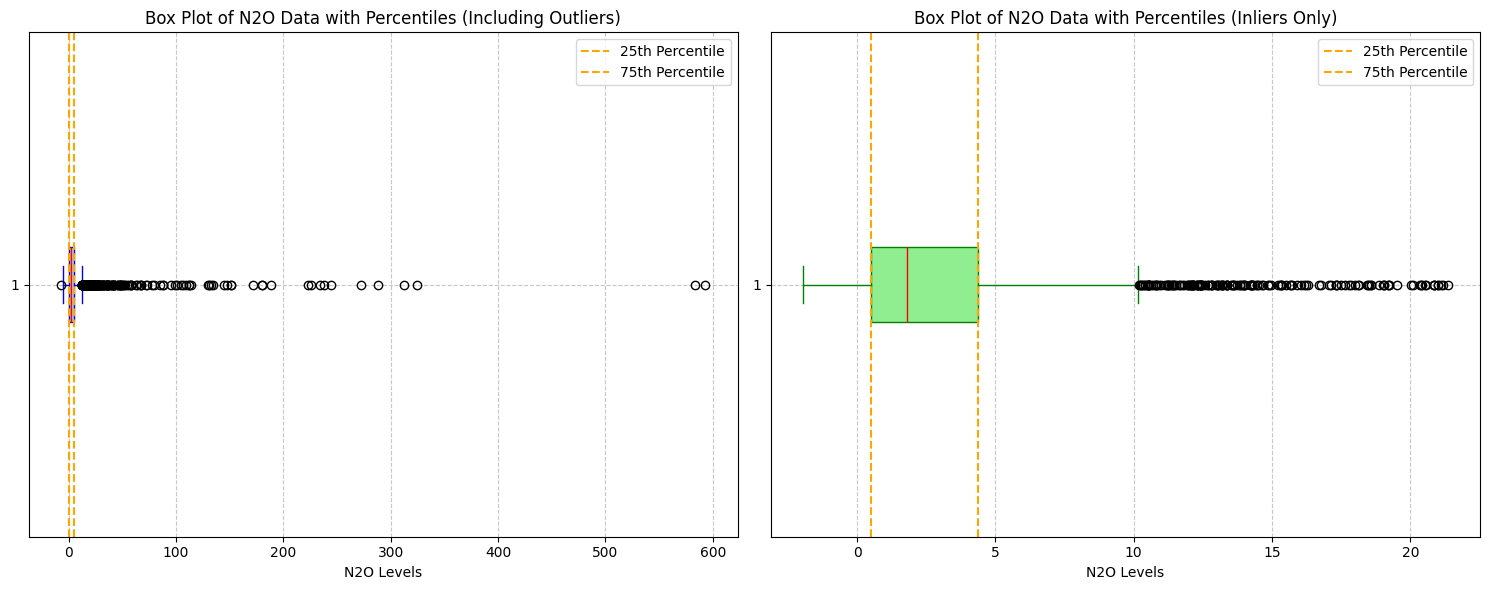

In [25]:
import numpy as np

# Prepare the figure with 1x2 layout
plt.figure(figsize=(15, 6))

# Function to add percentile lines to boxplot
def add_percentile_lines(ax, data, percentiles, color):
    for percentile in percentiles:
        value = np.percentile(data, percentile)
        ax.axvline(value, linestyle='--', color=color, label=f'{percentile}th Percentile')

# First plot: Box plot for the entire N2O dataset with percentiles
ax1 = plt.subplot(1, 2, 1)
plt.boxplot(data['N2O'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'), capprops=dict(color='blue'), medianprops=dict(color='red'))
add_percentile_lines(ax1, data['N2O'], [25,75], 'orange')
plt.title('Box Plot of N2O Data with Percentiles (Including Outliers)')
plt.xlabel('N2O Levels')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Second plot: Box plot for inliers only with percentiles
ax2 = plt.subplot(1, 2, 2)
plt.boxplot(inliers['N2O'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'),
            whiskerprops=dict(color='green'), capprops=dict(color='green'), medianprops=dict(color='red'))
add_percentile_lines(ax2, inliers['N2O'], [25,75], 'orange')
plt.title('Box Plot of N2O Data with Percentiles (Inliers Only)')
plt.xlabel('N2O Levels')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


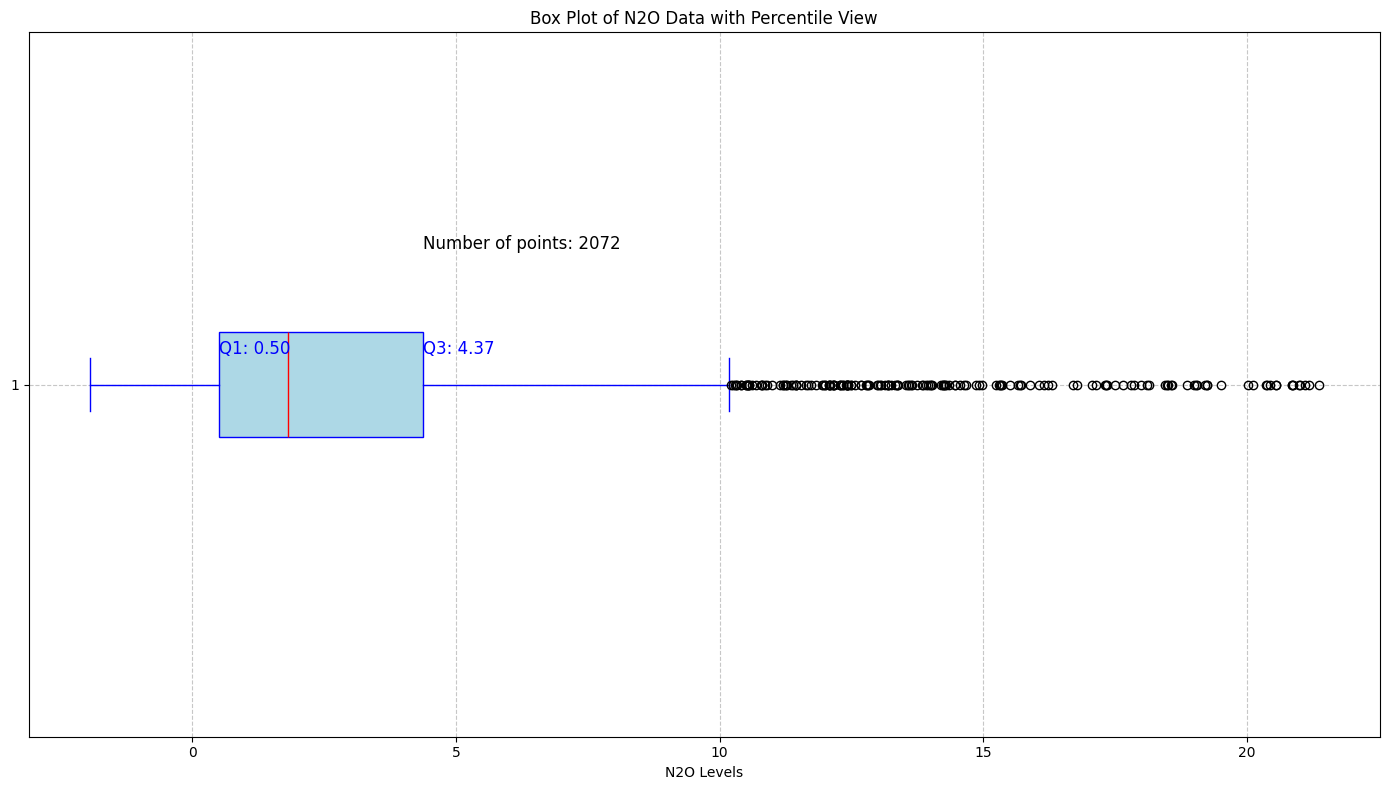

In [28]:
# Calculate key statistics for N2O
q1 = inliers['N2O'].quantile(0.25)
q3 = inliers['N2O'].quantile(0.75)
# median = inliers['N2O'].median()
# min_val = inliers['N2O'].min()
# max_val = inliers['N2O'].max()
# mean_val = inliers['N2O'].mean()
num_points = len(inliers['N2O'])

# Prepare the figure for boxplot with percentile view
plt.figure(figsize=(14, 8))

# Box plot with percentile view for the entire N2O dataset
plt.boxplot(inliers['N2O'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'), 
            capprops=dict(color='blue'), 
            medianprops=dict(color='red'))

# Annotate the box plot with Q1, Q3, and the number of data points
plt.text(q1, 1.05, f'Q1: {q1:.2f}', verticalalignment='center', fontsize=12, color='blue')
plt.text(q3, 1.05, f'Q3: {q3:.2f}', verticalalignment='center', fontsize=12, color='blue')
# plt.text(median, 1.05, f'Median: {median:.2f}', verticalalignment='center', fontsize=12, color='red')
# plt.text(mean_val, 1.05, f'Mean: {mean_val:.2f}', verticalalignment='center', fontsize=12, color='green')
# plt.text(min_val, 1.05, f'Min: {min_val:.2f}', verticalalignment='center', fontsize=12, color='purple')
# plt.text(max_val, 1.05, f'Max: {max_val:.2f}', verticalalignment='center', fontsize=12, color='purple')
plt.text(q3, 1.2, f'Number of points: {num_points}', verticalalignment='center', fontsize=12, color='black')

# Plot title and labels
plt.title('Box Plot of N2O Data with Percentile View')
plt.xlabel('N2O Levels')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


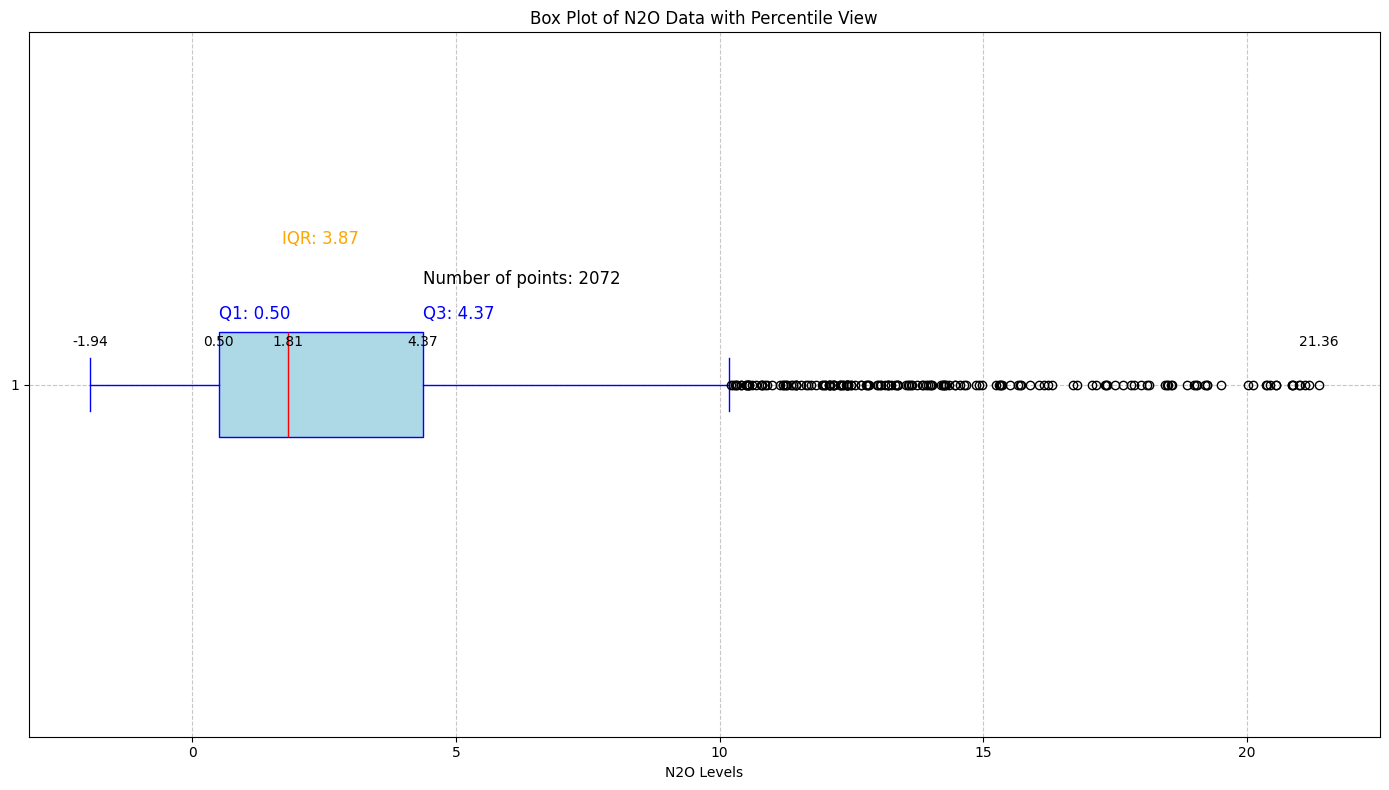

In [32]:
# Calculate key statistics for N2O
q1 = inliers['N2O'].quantile(0.25)
q3 = inliers['N2O'].quantile(0.75)
iqr = q3 - q1
# median = inliers['N2O'].median()
# min_val = inliers['N2O'].min()
# max_val = inliers['N2O'].max()
# mean_val = inliers['N2O'].mean()
num_points = len(inliers['N2O'])

# Prepare the figure for boxplot with percentile view
plt.figure(figsize=(14, 8))

# Box plot with percentile view for the entire N2O dataset
plt.boxplot(inliers['N2O'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'), 
            capprops=dict(color='blue'), 
            medianprops=dict(color='red'))

# Annotate the box plot with Q1, Q3, IQR, and the number of data points
plt.text(q1, 1.1, f'Q1: {q1:.2f}', verticalalignment='center', fontsize=12, color='blue')
plt.text(q3, 1.1, f'Q3: {q3:.2f}', verticalalignment='center', fontsize=12, color='blue')
# plt.text(median, 1.1, f'Median: {median:.2f}', verticalalignment='center', fontsize=12, color='red')
# plt.text(mean_val, 1.1, f'Mean: {mean_val:.2f}', verticalalignment='center', fontsize=12, color='green')
# plt.text(min_val, 1.1, f'Min: {min_val:.2f}', verticalalignment='center', fontsize=12, color='purple')
# plt.text(max_val, 1.1, f'Max: {max_val:.2f}', verticalalignment='center', fontsize=12, color='purple')
plt.text(q3, 1.15, f'Number of points: {num_points}', verticalalignment='center', fontsize=12, color='black')
plt.text((q1 + q3) / 2, 1.2, f'IQR: {iqr:.2f}', horizontalalignment='center', fontsize=12, color='orange')

# Annotate the number of data points above the tick points on x-axis
for point in [min_val, q1, median, q3, max_val]:
    plt.text(point, 1.05, f'{point:.2f}', verticalalignment='bottom', horizontalalignment='center', fontsize=10)

# Plot title and labels
plt.title('Box Plot of N2O Data with Percentile View')
plt.xlabel('N2O Levels')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()
